In [195]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import pivot
from pyexpat import features

In [196]:
df=pd.read_csv('customer_segmentation.csv')

In [197]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [198]:
df. shape


(2240, 29)

In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [200]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [201]:
max_value = df['Income'].max()

# Minimum value
min_value = df['Income'].min()
print("Max Income:", max_value)
print("Min Income:", min_value)

Max Income: 666666.0
Min Income: 1730.0


In [202]:
df.dropna(subset=['Income'], inplace=True)

In [203]:
df.isnull().sum().sum()

np.int64(0)

In [204]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,...,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,...,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [205]:
df["Education"].value_counts()

Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64

In [206]:
df["Marital_Status"].value_counts()

Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [207]:
df["Dt_Customer"]=pd.to_datetime(df["Dt_Customer"],dayfirst=True)

In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-null   i

In [209]:
df["Age"]=2025-df["Year_Birth"]

In [210]:
df["Age"]

0       68
1       71
2       60
3       41
4       44
        ..
2235    58
2236    79
2237    44
2238    69
2239    71
Name: Age, Length: 2216, dtype: int64

In [211]:
df["Total_Children"]=df["Kidhome"]+df["Teenhome"]

In [212]:
df["Total_Children"]

0       0
1       2
2       0
3       1
4       1
       ..
2235    1
2236    3
2237    0
2238    1
2239    2
Name: Total_Children, Length: 2216, dtype: int64

In [213]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Total_Children'],
      dtype='object')

In [214]:
spend_cols=['MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts']

In [215]:
df["Total_Spending"]=df[spend_cols].sum(axis=1)

In [216]:
df["Total_Spending"]

0       1529
1         21
2        734
3         48
4        407
        ... 
2235    1094
2236     436
2237    1217
2238     782
2239     151
Name: Total_Spending, Length: 2216, dtype: int64

In [217]:
df["Customer_since"]=(pd.Timestamp("today")-df["Dt_Customer"]).dt.days

In [218]:
df["Customer_since"]

0       4713
1       4163
2       4362
3       4189
4       4211
        ... 
2235    4431
2236    4069
2237    4205
2238    4206
2239    4672
Name: Customer_since, Length: 2216, dtype: int64

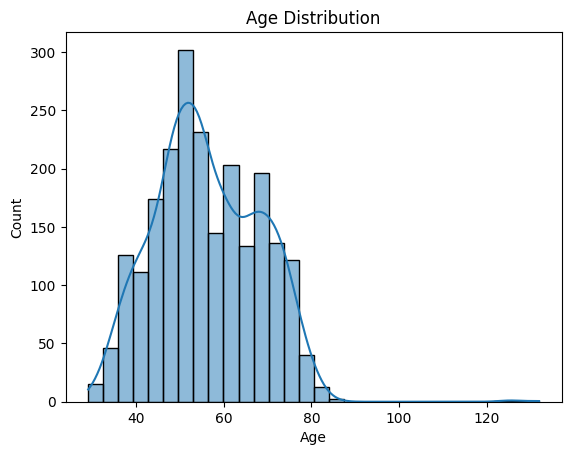

In [219]:
sns.histplot(df["Age"],bins=30,kde=True)
plt.title("Age Distribution")
plt.show()

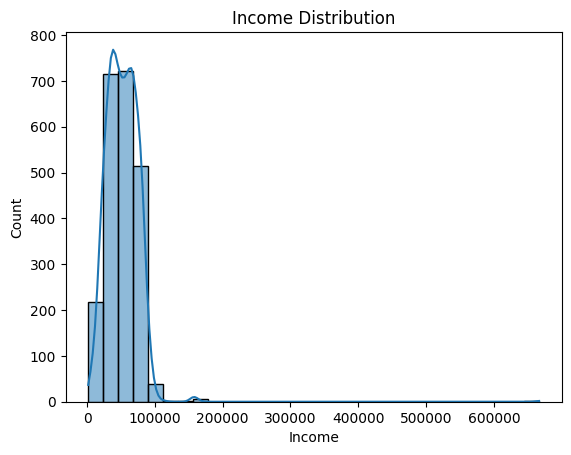

In [220]:
sns.histplot(df["Income"],bins=30,kde=True)
plt.title("Income Distribution")
plt.show()

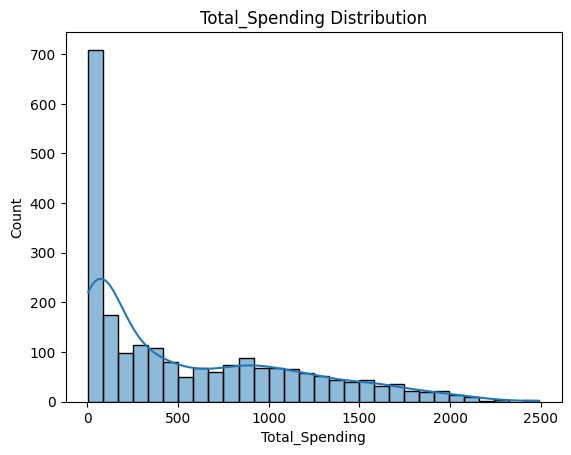

In [221]:
sns.histplot(df["Total_Spending"],bins=30,kde=True)
plt.title("Total_Spending Distribution")
plt.show()

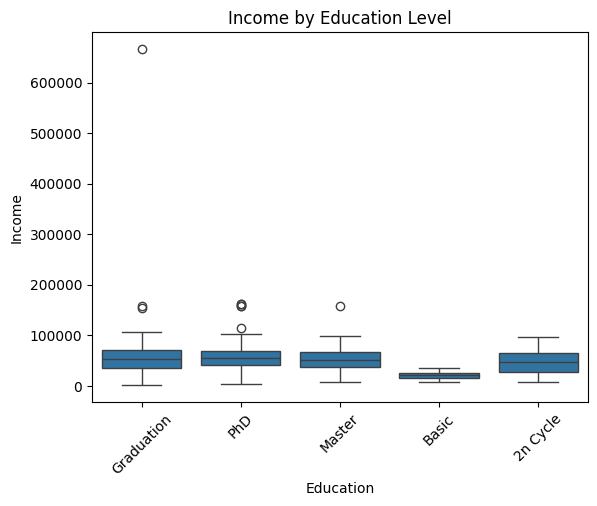

In [222]:
sns.boxplot(x="Education",y="Income",data=df)
plt.xticks(rotation=45)
plt.title("Income by Education Level")
plt.show()

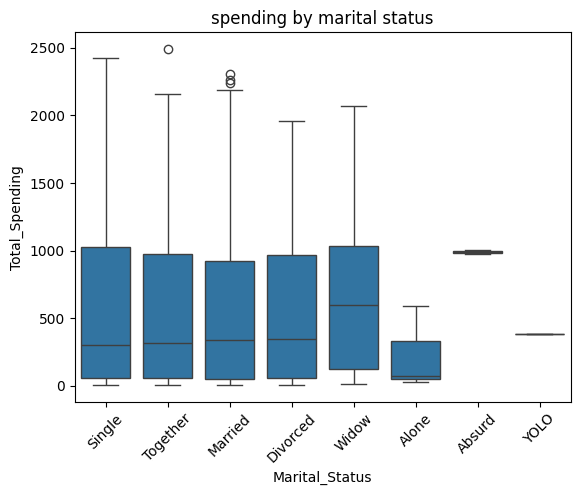

In [223]:
sns.boxplot(x="Marital_Status",y="Total_Spending",data=df)
plt.xticks(rotation=45)
plt.title("spending by marital status")
plt.show()

In [224]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Total_Children', 'Total_Spending', 'Customer_since'],
      dtype='object')

In [225]:
corr=df[["Income","Age","Recency","Total_Spending","NumWebPurchases","NumStorePurchases"]].corr()

In [226]:
corr

,Income,Age,Recency,Total_Spending,NumWebPurchases,NumStorePurchases
Income,1.000000,0.161791,-0.003970,0.668062,0.387878,0.529362
Age,0.161791,1.000000,0.016295,0.112779,0.153051,0.127891
Recency,-0.003970,0.016295,1.000000,0.019374,-0.005641,-0.000434
Total_Spending,0.668062,0.112779,0.019374,1.000000,0.515999,0.670327
NumWebPurchases,0.387878,0.153051,-0.005641,0.515999,1.000000,0.516240
NumStorePurchases,0.529362,0.127891,-0.000434,0.670327,0.516240,1.000000


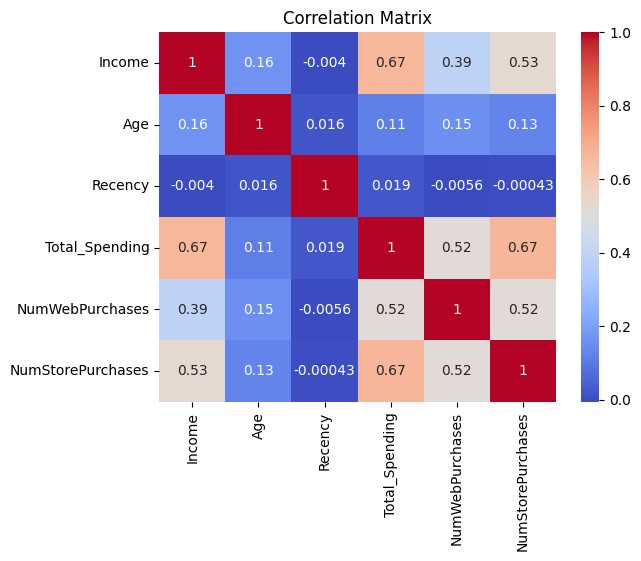

In [227]:
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [228]:
pivot_income=df.pivot_table(values="Income",index="Education",columns="Marital_Status",aggfunc="mean")

In [229]:
pivot_income

Marital_Status,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO
Education,,,,,,,,
2n Cycle,NaN,NaN,49395.130435,46201.100000,53673.944444,44736.410714,51392.200000,NaN
Basic,NaN,NaN,9548.000000,21960.500000,18238.666667,21240.071429,22123.000000,NaN
Graduation,79244.0,34176.0,54526.042017,50800.258741,51322.182927,55758.480702,54976.657143,NaN
Master,65487.0,61331.0,50331.945946,53286.028986,53530.560000,52109.009804,58401.545455,NaN
PhD,NaN,35860.0,53096.615385,58138.031579,53314.614583,56041.422414,60288.083333,48432.0


Text(0.5, 1.0, 'Income by Education and  Marital Status')

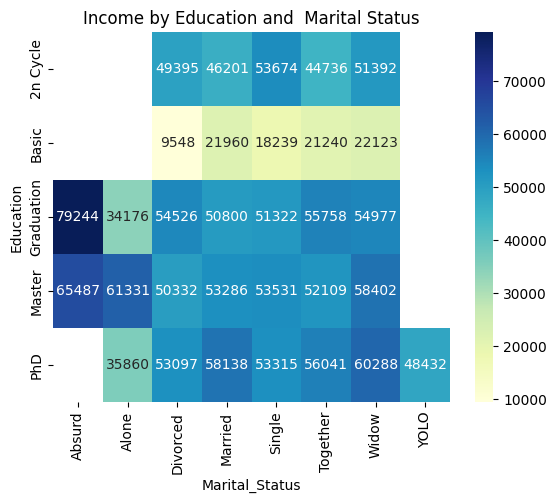

In [230]:
sns.heatmap(pivot_income,annot=True,fmt=".0f",cmap='YlGnBu')
plt.title("Income by Education and  Marital Status")

In [231]:
group1=df.groupby("Education")["Total_Spending"].mean().sort_values(ascending=False)

In [232]:
group1

Education
PhD           644.330561
Graduation    571.002688
Master        569.578082
2n Cycle      448.050000
Basic          58.962963
Name: Total_Spending, dtype: float64

Text(0.5, 1.0, 'Average spending by Education ')

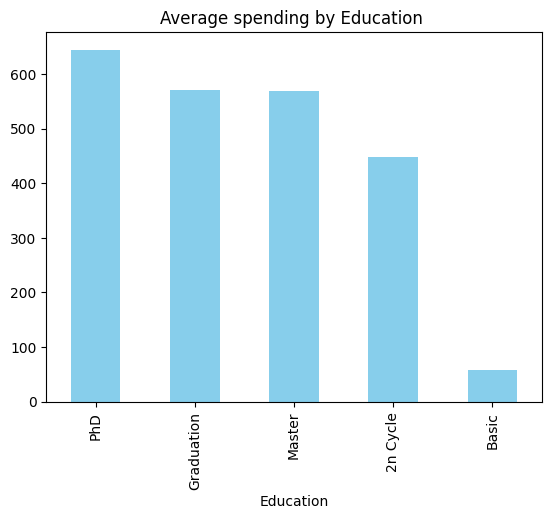

In [233]:
group1.plot(kind="bar",color="skyblue")
plt.title("Average spending by Education ")

In [234]:
df["AcceptedAny"]=df[["AcceptedCmp1","AcceptedCmp2","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","Response"]].sum(axis=1)

In [235]:
df["AcceptedAny"].unique()

array([1, 0, 3, 2, 4, 5])

In [236]:
df["AcceptedAny"]=df["AcceptedAny"].apply(lambda x: 1 if x > 0 else 0)
df["AcceptedAny"].unique()

array([1, 0])

In [237]:
group2= df.groupby("Marital_Status")["AcceptedAny"].mean().sort_values(ascending=False)

In [238]:
group2

Marital_Status
Absurd      0.500000
YOLO        0.500000
Widow       0.342105
Alone       0.333333
Single      0.312102
Divorced    0.297414
Married     0.252042
Together    0.251309
Name: AcceptedAny, dtype: float64

Text(0.5, 1.0, 'Acceptance rate by Marital Status')

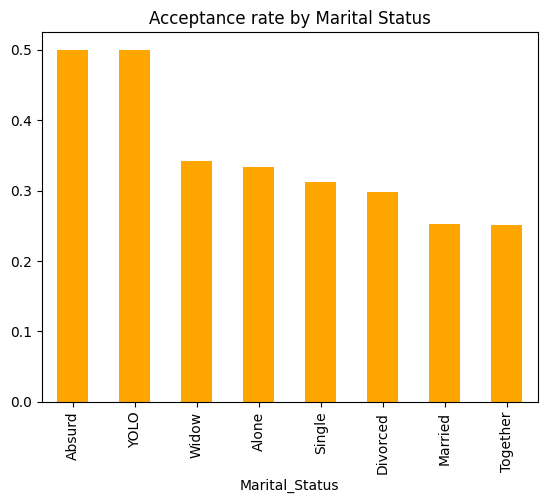

In [239]:
group2.plot(kind="bar",color="orange")
plt.title("Acceptance rate by Marital Status")

In [240]:
bins=[18,30,40,50,60,70,90]


In [241]:
labels=["18-29","30-39","40-49","50-59","60-69","70+"]


In [242]:
df["AgeGroup"]=pd.cut(df["Age"],bins=bins,labels=labels)


In [243]:
df["AgeGroup"]

0       60-69
1         70+
2       50-59
3       40-49
4       40-49
        ...  
2235    50-59
2236      70+
2237    40-49
2238    60-69
2239      70+
Name: AgeGroup, Length: 2216, dtype: category
Categories (6, object): ['18-29' < '30-39' < '40-49' < '50-59' < '60-69' < '70+']

In [244]:
group3=df.groupby("AgeGroup")["Income"].mean()

C:\Users\Pc\AppData\Local\Temp\ipykernel_16208\585466115.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group3=df.groupby("AgeGroup")["Income"].mean()


In [245]:
group3

AgeGroup
18-29    46658.000000
30-39    46283.028302
40-49    49224.877034
50-59    50812.913303
60-69    56200.827887
70+      58944.316294
Name: Income, dtype: float64

Text(0.5, 1.0, 'Average income by Age Group')

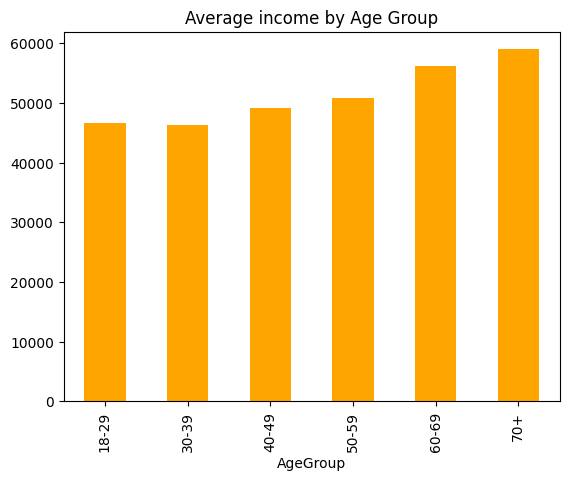

In [246]:
group3.plot(kind="bar",color="orange")
plt.title("Average income by Age Group")

In [269]:
 features=["Age","Income","Total_Spending","NumWebPurchases","NumStorePurchases","NumWebVisitsMonth","Recency"]

In [248]:
X=df[features].copy()

In [249]:
X

,Age,Income,Total_Spending,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,Recency
0,68,58138.0,1529,8,4,7,58
1,71,46344.0,21,1,2,5,38
2,60,71613.0,734,8,10,4,26
3,41,26646.0,48,2,4,6,26
4,44,58293.0,407,5,6,5,94
...,...,...,...,...,...,...,...
2235,58,61223.0,1094,9,4,5,46
2236,79,64014.0,436,8,5,7,56
2237,44,56981.0,1217,2,13,6,91
2238,69,69245.0,782,6,10,3,8


In [250]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [251]:
X_scaled = scaler.fit_transform(X)

In [252]:
X_scaled

array([[ 0.98644293,  0.2340627 ,  1.67383183, ..., -0.55414289,
         0.69323197,  0.31053212],
       [ 1.23680074, -0.23455948, -0.93944575, ..., -1.16951781,
        -0.1315745 , -0.38050944],
       [ 0.31882209,  0.76947764,  0.29614239, ...,  1.29198186,
        -0.54397773, -0.79513438],
       ...,
       [-1.01641959,  0.18809052,  1.13315371, ...,  2.21504423,
         0.28082874,  1.4507507 ],
       [ 1.06989553,  0.67538765,  0.37932364, ...,  1.29198186,
        -0.95638097, -1.41707178],
       [ 1.23680074,  0.02470453, -0.7141632 , ..., -0.55414289,
         0.69323197, -0.31140528]], shape=(2216, 7))

In [253]:
from sklearn.cluster import KMeans

In [254]:
wcss=[]

In [255]:
for i in range(2,10):
    km = KMeans(n_clusters=i)
    km.fit(X_scaled)
    wcss.append(km.inertia_)

In [256]:
wcss

[10239.750859503842,
 9322.662886105469,
 8421.943902426865,
 7590.284434876405,
 7192.773454502372,
 6820.0527217680055,
 6472.488834436532,
 6198.409290898351]

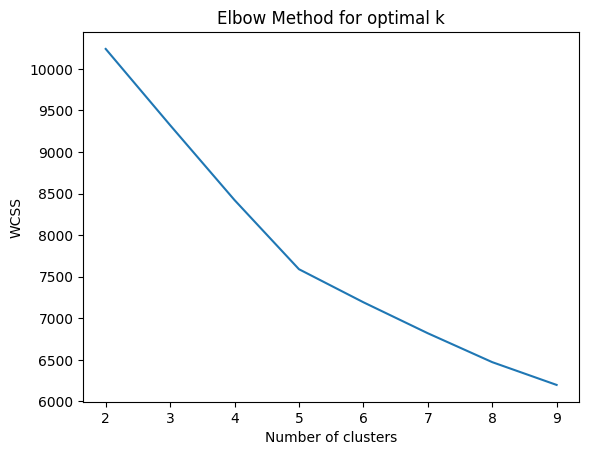

In [257]:
plt.plot(range(2,10), wcss)
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method for optimal k")
plt.show()

In [258]:
kmeans=KMeans(n_clusters=6)
df["Cluster"]=kmeans.fit_predict(X_scaled)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Z_CostContact,Z_Revenue,Response,Age,Total_Children,Total_Spending,Customer_since,AcceptedAny,AgeGroup,Cluster
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,3,11,1,68,0,1529,4713,1,60-69,5
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,3,11,0,71,2,21,4163,0,70+,3
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,3,11,0,60,0,734,4362,0,50-59,5
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,3,11,0,41,1,48,4189,0,40-49,3
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,3,11,0,44,1,407,4211,0,40-49,1


In [259]:
cluster_summary=df.groupby("Cluster")[features].mean()

In [260]:
cluster_summary

,Age,Income,Total_Spending,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,Recency
Cluster,,,,,,,
0,62.544218,53701.074830,523.435374,5.884354,6.316327,6.323129,25.806122
1,55.009766,36525.757812,110.574219,2.367188,3.455078,6.359375,76.246094
2,69.845118,73861.636364,1110.242424,4.414141,8.185185,2.414141,54.895623
3,50.862205,32016.816929,68.273622,1.887795,2.988189,6.647638,26.387795
4,46.212500,78896.740625,1243.081250,4.584375,8.562500,2.603125,46.706250
5,58.143860,62604.207018,965.392982,8.329825,8.912281,6.122807,60.814035


In [261]:
df["Cluster"].value_counts()

Cluster
1    512
3    508
4    320
2    297
0    294
5    285
Name: count, dtype: int64

In [262]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_data=pca.fit_transform(X_scaled)
df["PCA1"],df["PCA2"]=pca_data[:,0],pca_data[:,1]


In [263]:
pca_data

array([[ 1.10135609, -0.2069141 ],
       [-1.32167074,  0.25367219],
       [ 1.88954561, -1.01981532],
       ...,
       [ 1.19483713,  1.16409974],
       [ 1.88280934, -1.17528269],
       [-0.83687269, -0.17102343]], shape=(2216, 2))

In [264]:
df["PCA1"]

0       1.101356
1      -1.321671
2       1.889546
3      -1.770520
4       0.038601
          ...   
2235    1.092970
2236    0.532004
2237    1.194837
2238    1.882809
2239   -0.836873
Name: PCA1, Length: 2216, dtype: float64

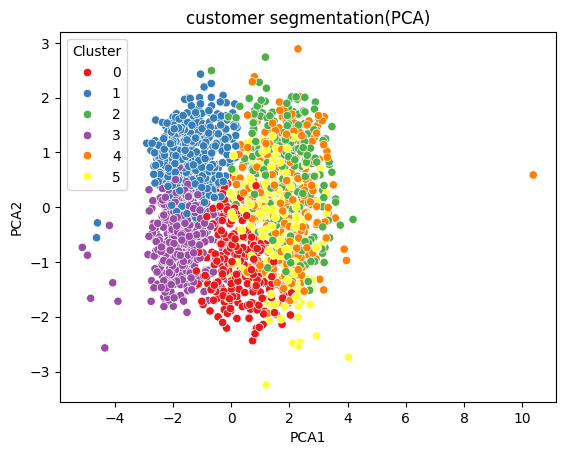

In [265]:
sns.scatterplot(x="PCA1",y="PCA2",hue="Cluster",data=df,palette="Set1")
plt.title("customer segmentation(PCA)")
plt.show()

In [266]:
cluster_summary

,Age,Income,Total_Spending,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,Recency
Cluster,,,,,,,
0,62.544218,53701.074830,523.435374,5.884354,6.316327,6.323129,25.806122
1,55.009766,36525.757812,110.574219,2.367188,3.455078,6.359375,76.246094
2,69.845118,73861.636364,1110.242424,4.414141,8.185185,2.414141,54.895623
3,50.862205,32016.816929,68.273622,1.887795,2.988189,6.647638,26.387795
4,46.212500,78896.740625,1243.081250,4.584375,8.562500,2.603125,46.706250
5,58.143860,62604.207018,965.392982,8.329825,8.912281,6.122807,60.814035


In [271]:
import joblib
joblib.dump(kmeans,"Kmeans_model.pkl")
joblib.dump(scaler,"scalar.pkl")

['scalar.pkl']